In [1]:
# -*- coding: utf8

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Para evitar a confusão da aula passada, colocando alguns defaults!
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.style.use('seaborn-colorblind')
plt.ion()
plt.rcParams['figure.figsize']  = (18, 10)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula06 - Estatística Básica

**Material adaptado do Professor Pedro Olmo.**

## Objetivos

1. Entender como sumarizar dados.
1. Relembrar tendências centrais de dados.
1. Mais importante, entender as falácias de sumarização de dados.

## Resultado Esperado

1. Entendimento de médias, medianas, desvio padrão e quartis.
1. Entendimento de propriedades das médias

## Introdução

As estatísticas referem-se à matemática e técnicas com as quais entendemos os dados. É um campo rico e enorme, mais adequado a uma prateleira (ou sala) em uma biblioteca do que a uma aula de um curso. De qualquer forma, nosso curso de ICD tem um viés estatístico. Portanto, vamos iniciar do mais básico que é a sumarização de bases de dados com médias, medianas e desvios.

## Descrevendo uma coluna bem comportada dados

Vamos lembrar um pouco de histogramas e falar sobre CDF empírica. Para tal, vamos entender a duração das músicas sa Billboard. Na tabela abaixo, temos as músicas mais populares (semanalmente) de 2000 até 2018. Vamos focar apenas no id único (spotify id) das mesmas. Como algumas músicas ocorrem mais de uma vez, vamos também filtrar as duplicatas.

**Sempre visualize seus dados**. Como primeira abordagem, plote seus dados. Duas ideias inicias: PDF e CDF!

Observe que aqui indico um `na_values`, para falar de missing data (aula passada). Além do mais, faço um `dropna`.

#### Histogramas

In [4]:
# 1. Lendo os dados.
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/05-Tendencias-Centrais/billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')
# 2. Removendo na
df = df[['date', 'artist', 'title', 'duration_ms', 'spotify_id', 'lyrics']]
df = df.dropna()
df.head()

,date,artist,title,duration_ms,spotify_id,lyrics
1,6/21/18,Juice WRLD,All Girls Are The Same,165820.0,0XySogm94T51XF5F2jumXm,"They're rotting my brain, love\nThese hoes are..."
2,6/21/18,Kanye West,All Mine,145507.0,3qnoOm4fwZPBS116f5hpgF,"Yeah, you supermodel thick\nDamn, that ass bus..."
5,6/21/18,Selena Gomez,Back To You,207905.0,4hQ6UGyWQIGJmHSo0J88JW,Took you like a shot\nThought that I could cha...
7,6/21/18,Cardi B,Be Careful,210787.0,2Yl4OmDby9iitgNWZPwxkd,"Yeah\nBe careful, be careful, be careful with ..."
8,6/21/18,Luke Combs,Beautiful Crazy,193200.0,4Qx06Fzsepmdz2NGSWfZck,Her day starts with a coffee\nAnd ends with a ...


Vamos observar quantas músicas temos!

In [5]:
dur = df['duration_ms']
dur.shape

(7193,)

Remover duplicatas, uma músicas pode aparecer mais de uma vez na base!

In [6]:
dur = dur.drop_duplicates()
dur.shape

(5387,)

Converter a duração para minutos.

In [7]:
data = dur / (1000 * 60)

Agora, o histograma!!!

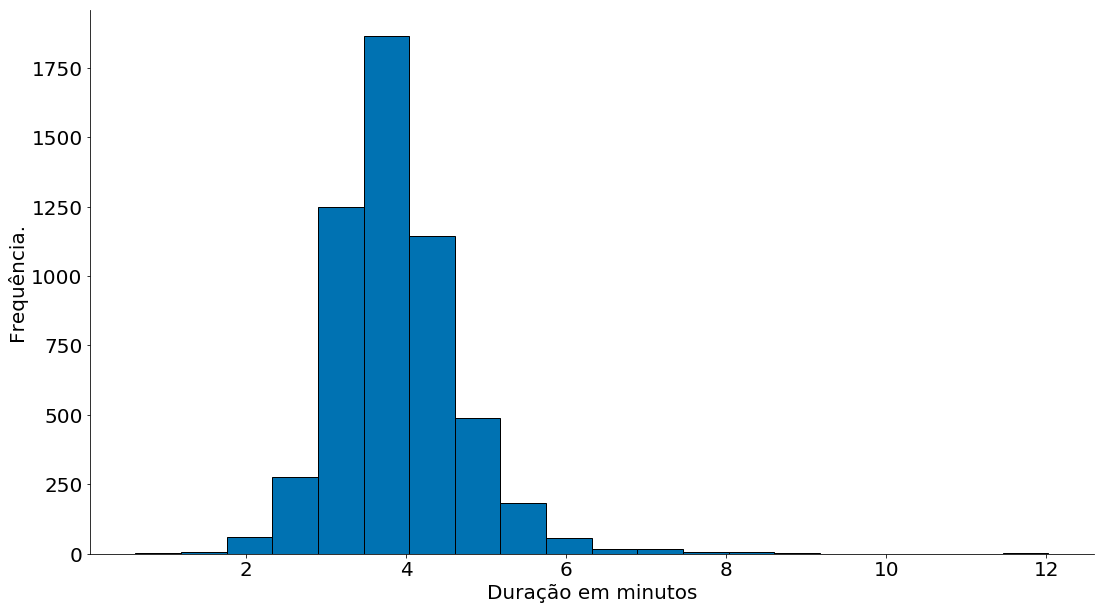

In [8]:
plt.hist(data, bins=20, edgecolor='k')
plt.xlabel('Duração em minutos')
plt.ylabel('Frequência.')
despine(plt.gca())

#### CDFs

Vamos fazer um código simples para montar uma CDF. A função de nome CDF (em inglês de Cumulative Distribution Function) é igual à probabilidade de que a variável aleatória X assuma um valor inferior ou igual a determinado x. Note que, via de regra, para cada x, a função CDF assumirá um valor diferente. Para estimar uma CDF de forma empírica, realizamos os seguintes passos:

1. Ordene os dados `x = np.sort(data)`
1. Conte quantos pontos menor do que `x[i]` existem para cada `i`
    1. Para isto, vamos montar um vetor `y = np.cumsum([0, 1, 2, ....]) = [0, 1, 3, 6, 10]`. y é um contagem cumulativa.
    1. Note que y conta quantos pontos existe até um ponto i, i.e., `y[i] = #pts < x[i]`.
1. Normalize `y`

In [9]:
def ecdf(data):
    x = np.sort(data)
    count = np.arange(len(data))
    y = count.cumsum()
    y = y / y.max()
    return x, y

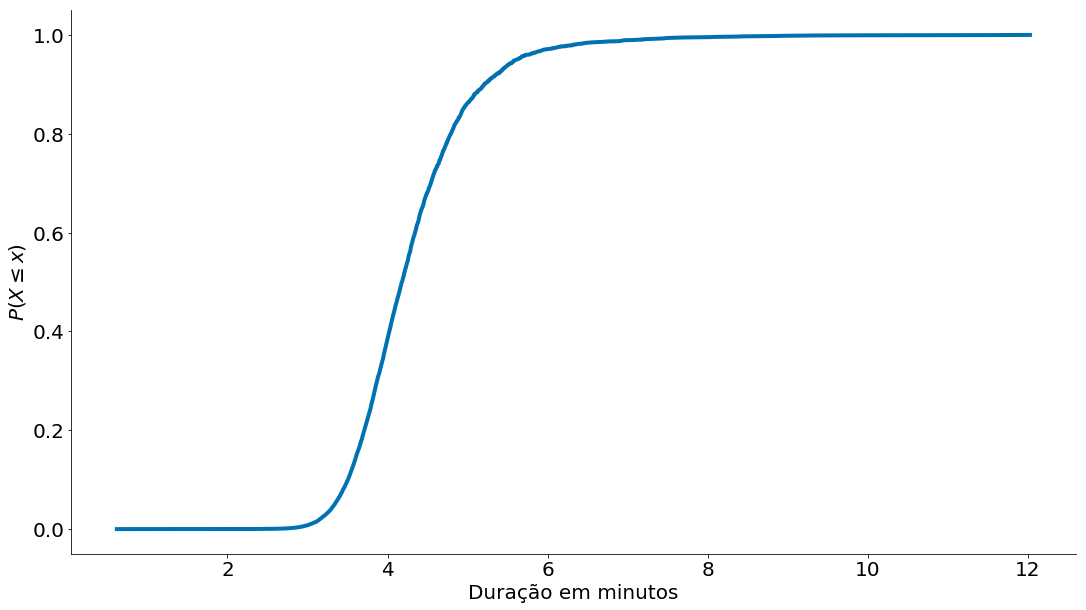

In [10]:
x, y = ecdf(data)
plt.plot(x, y)
plt.xlabel('Duração em minutos')
plt.ylabel('$P(X \leq x)$')
despine()

A biblioteca **statsmodels** tem a mesma função. É o maior import que faço na minha vida.

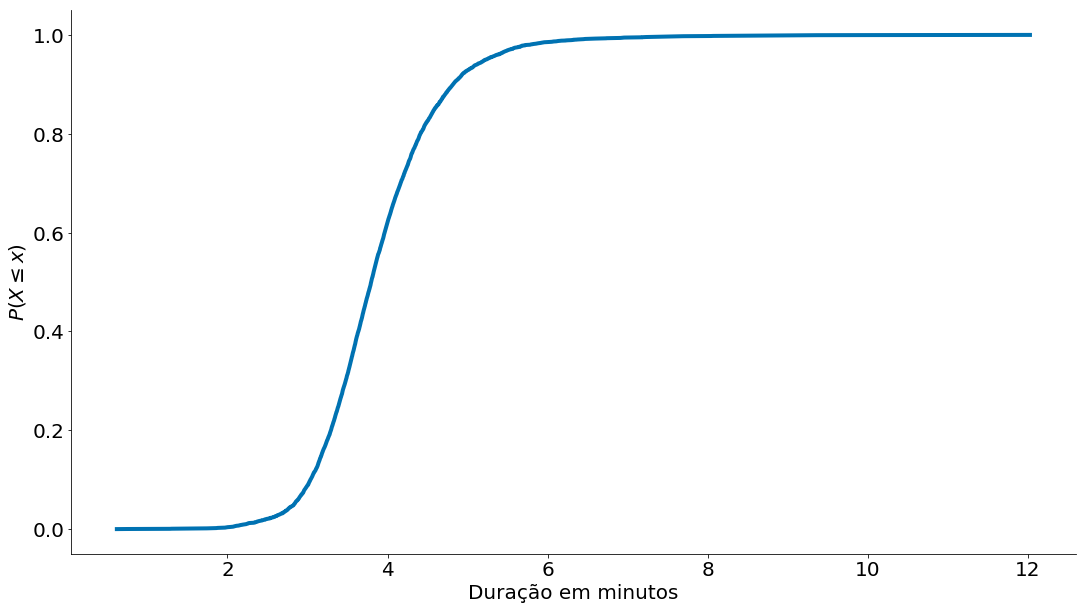

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data)
x = ecdf.x
y = ecdf.y
plt.plot(x, y)
plt.xlabel('Duração em minutos')
plt.ylabel('$P(X \leq x)$')
despine()

## Tendências Centrais

Agora, vamos sumarizar os dados das músicas. Uma descrição óbvia de qualquer conjunto $x_1, x_2, ..., x_n$ de dados é simplesmente os dados em si:

In [12]:
data.head()

1    2.763667
2    2.425117
5    3.465083
7    3.513117
8    3.220000
Name: duration_ms, dtype: float64

Para um conjunto de dados pequeno o suficiente, isso pode até ser a melhor descrição. Mas, para um conjunto de dados maior, isso é difícil e provavelmente opaco (temos alguns milhares de números). Por esse motivo, usamos estatísticas para destilar e comunicar características relevantes dos nossos dados.

Infelizmente, este gráfico ainda é muito difícil de explicar em conversas informais. Então você pode começar a gerar algumas estatísticas. Provavelmente, a estatística mais simples é o número de pontos de dados:

In [13]:
num_points = len(data)
print("numero de pontos:", num_points)

numero de pontos: 5387


Um vetor numpy tem diferentes atributos para pegar a dimensão.

In [14]:
data.size

5387

In [15]:
# Shape indica o tamanho para cada dimensão, em uma matriz teríamos dois valores.
data.shape 

(5387,)

In [16]:
# note como os dados originais tem 5 colunas
df.shape

(7193, 6)

Você provavelmente também está interessado no maior e menor valor:

In [17]:
largest_value = max(data) 
smallest_value = min(data)
print("maximo: ", largest_value, "\nminimo: ", smallest_value)

maximo:  12.026333333333334 
minimo:  0.6177833333333334


Ou, usando numpy / pandas

In [18]:
data.max()

12.026333333333334

In [19]:
data.min()

0.6177833333333334

In [20]:
np.min(data)

0.6177833333333334

Esses são apenas casos especiais quando queremos saber os valores em posições específicas:

In [21]:
sorted_values = np.sort(data)
smallest_value = sorted_values[0] 
second_smallest_value = sorted_values[1] 
second_largest_value = sorted_values[-2] 
print("menor valor: ", smallest_value)
print("segundo menor valor: ", second_smallest_value)
print("segundo maior valor: ", second_largest_value)

menor valor:  0.6177833333333334
segundo menor valor:  0.75
segundo maior valor:  11.474216666666667


Olhando os top 20 valores

In [22]:
sorted_values[-20:]

array([ 7.45733333,  7.46821667,  7.47621667,  7.5608    ,  7.67621667,
        7.69736667,  7.93778333,  8.03933333,  8.06911667,  8.22333333,
        8.38181667,  8.42955   ,  8.67978333,  8.83755   ,  8.93333333,
        9.12888333,  9.36      ,  9.96555   , 11.47421667, 12.02633333])

# Tendências Centrais

Normalmente, queremos saber onde nossos dados $x_1, x_2, ..., x_n$ estão centralizados. Normalmente, usamos a média $\bar{x}$, que é apenas a soma dos dados dividida por sua contagem $n$:

$${\bar {x}}={\frac {1}{n}}\left(\sum _{i=1}^{n}{x_{i}}\right)={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}$$ 

Um código simples para o cálculo da média seria:

In [23]:
def mean(x):
    return sum(x) / len(x)

print("media: ", mean(data))
# 7.333333

media:  3.8836518470391788


Ou de forma equivalente, podemos usar x.mean() caso x seja um vetor `numpy`.

In [24]:
data.mean()

3.883651847039168

Ou ainda

In [25]:
np.mean(data)

3.883651847039168

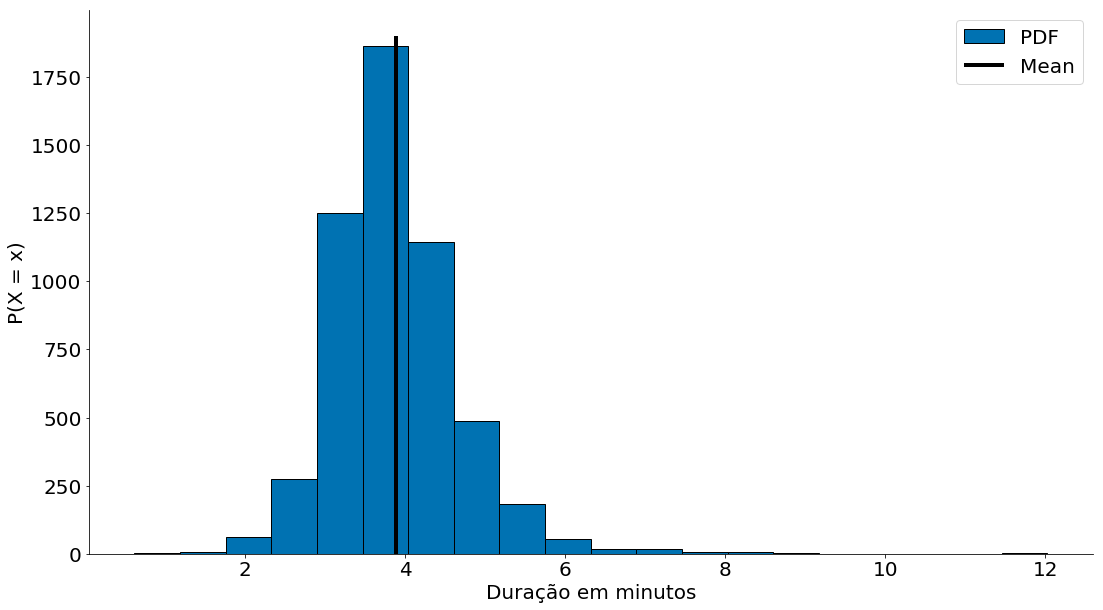

In [26]:
plt.hist(data, bins=20, label='PDF', edgecolor='k')
plt.vlines(data.mean(), 0, 1900, label='Mean', edgecolor='k')
plt.xlabel('Duração em minutos')
plt.ylabel('P(X = x)')
plt.legend()
despine()

Se você tiver dois pontos de dados (ou *data points*), a média é simplesmente o ponto intermediário entre eles. À medida que você adiciona mais pontos, a média muda, mas sempre depende do valor de cada ponto.

Às vezes, também estaremos interessados na mediana, que é o valor intermediário (se o número de pontos de dados for ímpar) ou a média dos dois valores intermediários (se o número de pontos de dados for par).

Por exemplo, se temos cinco pontos de dados em um vetor ordenado `x`, a mediana é `x[5 // 2]`  ou `x[2]`. Se tivermos seis pontos de dados, calculamos a média entre `x[2]` (o terceiro ponto) e `x[3]` (o quarto ponto).

Observe que, ao contrário da média, a mediana não depende de todos os valores dos seus dados. Por exemplo, se você tornar o maior ponto maior (ou o menor ponto menor), os pontos do meio permanecem inalterados, o que significa que a mediana também.

A função mediana é um pouco mais complicada do que você poderia esperar, principalmente por causa do caso "par":

In [27]:
def median(v):
    """encontra o valor mais intermediario de v"""
    n = len(v)
    sorted_v = list(sorted(v))
    midpoint = n // 2 # // eh a divisao inteira
    
    if n % 2 == 1:
        # se impar, retorna o valor do meio
        return sorted_v[midpoint]
    else:
        # se par, retorna a media dos dois valores intermediarios
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [28]:
def median_v2(v):
    n = len(v)
    sorted_v = sorted(v)
    return (sorted_v[math.floor((n-1)/2)] + sorted_v[math.ceil((n-1)/2)])/2

In [29]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8, 9]
print("mediana de a = ", median(a))
print("mediana de b = ", median(b))

print("mediana da duração das músicas:", median(data))

mediana de a =  2.5
mediana de b =  7
mediana da duração das músicas: 3.79545


Novamente, no âmbito da matéria é esperado que você entenda os códigos acima. Existem forma de encontrar medianas até mais rápido, usando o algoritmo quickselect. Na prática, podemos fazer uso do `median` do numpy.

In [30]:
np.median(a)

2.5

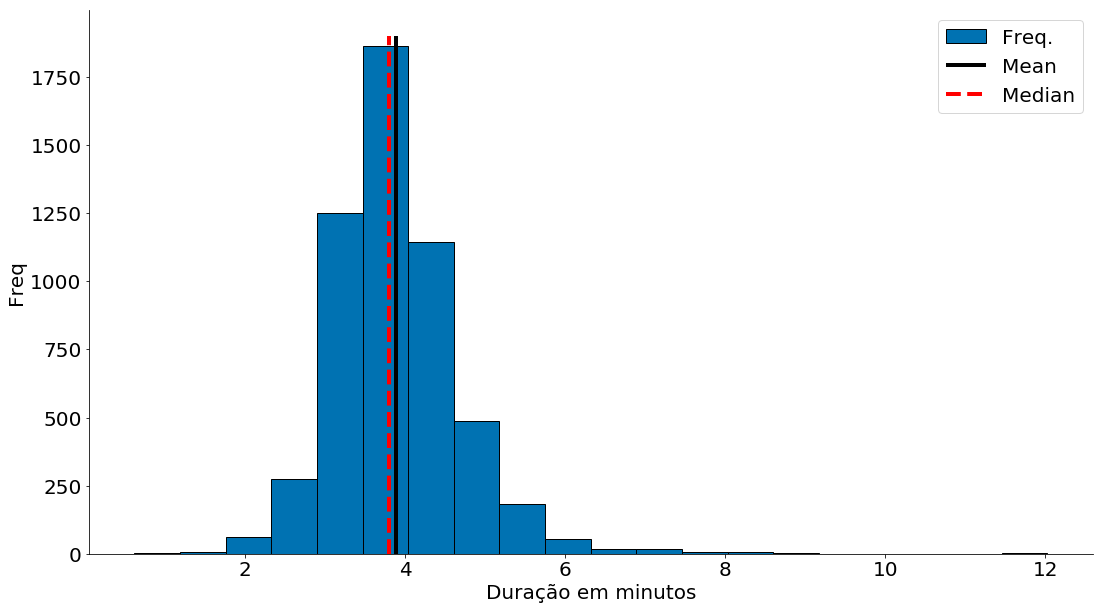

In [31]:
plt.hist(data, bins=20, label='Freq.', edgecolor='k')
plt.vlines(data.mean(), 0, 1900, label='Mean', edgecolor='k')
plt.vlines(data.median(), 0, 1900, linestyles='--', label='Median', color='red')
plt.xlabel('Duração em minutos')
plt.ylabel('Freq')
plt.legend()
despine()

Vamos agora observar o boxplot das durações. Um boxplot representa a variação de dados observados de uma variável numérica por meio de quartis.

1. primeiro quartil (designado por Q1/4) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil
1. segundo quartil (designado por Q2/4) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil.
1. terceiro quartil (designado por Q3/4) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil

[Text(0, 0, 'Duração')]

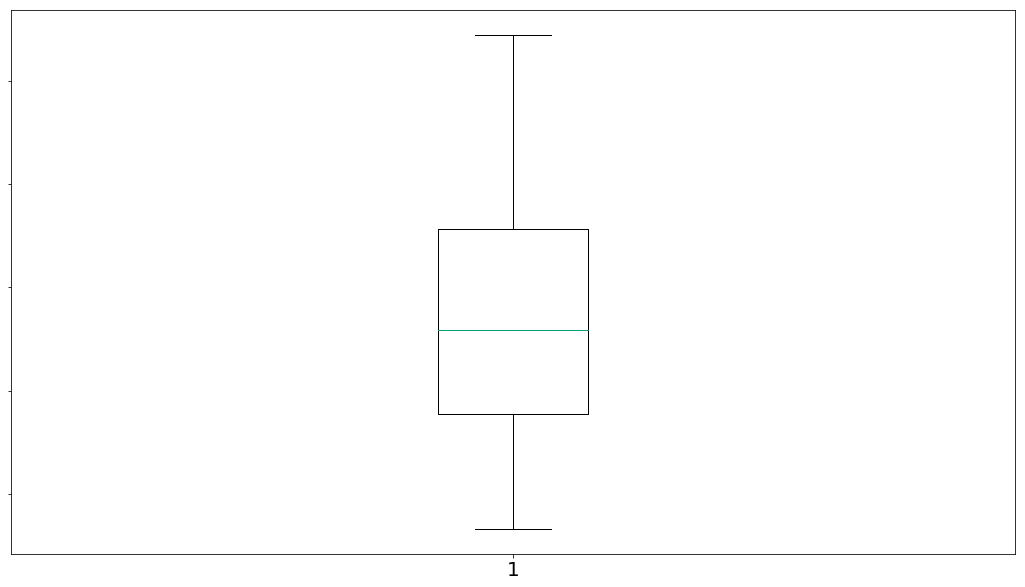

In [32]:
# com whis=[5, 95] eu mostro P(X < x) = 5% e P(X > x) = 95%
plt.boxplot([data], sym='', vert=True, whis=[5, 95])
ax = plt.gca()
ax.set_yticklabels(['Duração'])

Claramente, a média é mais simples de calcular e varia suavemente conforme nossos dados são alterados. Se tivermos `n` pontos de dados e um deles aumentar em alguma quantidade pequena `e`, então necessariamente a média aumentará em `e/n`. (Isso torna a média passível de todo tipo de truque de cálculo.) No entanto, para encontrar a mediana, temos que ordenar nossos dados. E alterar um dos nossos pontos de dados em uma pequena quantidade `e` pode aumentar a mediana por `e`, por algum número menor que `e` ou não a modificar de qualquer forma (dependendo do resto dos dados).

**Observação:** Existem, de fato, truques não óbvios para calcular eficientemente medianas sem ordenar os dados. No entanto, tais truques estão além do escopo deste curso, portanto, vamos ordernar os dados quando precisarmos calcular a mediana.

Ao mesmo tempo, a média é muito sensível a valores discrepantes (*outliers*) em nossos dados. Se a música mais longa fosse de mais de 1h (https://www.youtube.com/watch?v=10SnNfxjAI8), a média seria afetada. Em contraprtida, a mediana permaneceria a mesma. Se os valores discrepantes forem, provavelmente, dados incorretos (ou, de outro modo, não representativos de qualquer fenômeno que estamos tentando entender), a média poderá, às vezes, nos fornecer uma imagem enganosa. Por exemplo, a história é frequentemente contada que em meados da década de 1980, a graduação da Universidade da Carolina do Norte com a maior média de salário inicial era a geografia. A razão disso? A estrela da NBA (e *outlier*) Michael Jordan formou-se em geografia.

In [33]:
data_new = data.copy()
# Vamos supor uma música gigantesca!
data_new = data_new.append(pd.Series([9999]))
print(data.mean(), data_new.mean())

3.883651847039168 5.738721696362286


Observe como a mediana se mantém!

In [34]:
print(data.median(), data_new.median())

3.79545 3.7955


Uma generalização da mediana é o quantil, que representa o menor valor maior que um certo percentual dos dados (A mediana representa o valor maior que 50% dos dados.)

In [35]:
def quantile(x, p):
    """retorna o pth-percentil em x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]


print("quantil 10: ", quantile(data, 0.10))
print("quantil 25: ", quantile(data,0.25))
print("quantil 75: ", quantile(data,0.75))
print("quantil 90: ", quantile(data,0.90))

quantil 10:  3.0353333333333334
quantil 25:  3.38755
quantil 75:  4.283333333333333
quantil 90:  4.819333333333334


Outra medida para tendência central dos dados é a moda, que é(são) o(s) valor(es) mais comum(ns):

In [36]:
def mode(x):
    """retorna uma lista, pois os dados podem ter mais de uma moda"""
    x = np.asanyarray(x)
    unique, counts = np.unique(x, return_counts=True)
    max_count = counts.max()
    return unique[counts == max_count]

In [37]:
a = [1, 2, 3, 4, 2, 4, 4]
print("moda de a: ", mode(a))

moda de a:  [4]


Observe que para casos contínuos como as músicas a moda faz pouco sentido. Temos que arredondar os mesmos.

In [38]:
print("moda das músicas em minutos truncadas: ",
      mode(np.round(data, 0)))

moda das músicas em minutos truncadas:  [4.]


## Dados de Cauda Pesada

Quando usarmos esses descritores para descrever dados, devemos ter muito cuidado. Considere, por exemplo, dados que possuem uma "cauda pesada", como uma amostra da [distribuição de Pareto](https://en.wikipedia.org/wiki/Pareto_distribution). Um bom exemplo de dados deste tipo é a frequência de palavras nas letras de cada música.
Vamos construir uma nova série com tal informação!

Note que temos que ter cuidado com os dados.
1. Músicas se repetem na billboard.
2. Temos que limpar acentos e pontuação. Para tal, expressões regulares são úteis.

In [39]:
from collections import Counter

import re

counter = Counter()
for row in df['lyrics'].unique(): # Com unique eu filtro letras iguais.
    # o código re.sub(r'[^\w\s]', '', row.lower()) tira todos os acentos!
    words = re.sub(r'[^\w\s]', '', row.lower()).strip().split()
    counter.update(set(words))

palavras = pd.Series(counter)
palavras.head(20)

women        256
carlo          6
before       956
truth        393
with        4223
break        734
minutes       65
feelings     174
wake         335
girls        679
mind        1280
race          78
all         4866
feel        1993
ho           190
put         1551
from        2551
in          5745
want        2386
it          5674
dtype: int64

Agora vamos plotar o histograma dos dados:

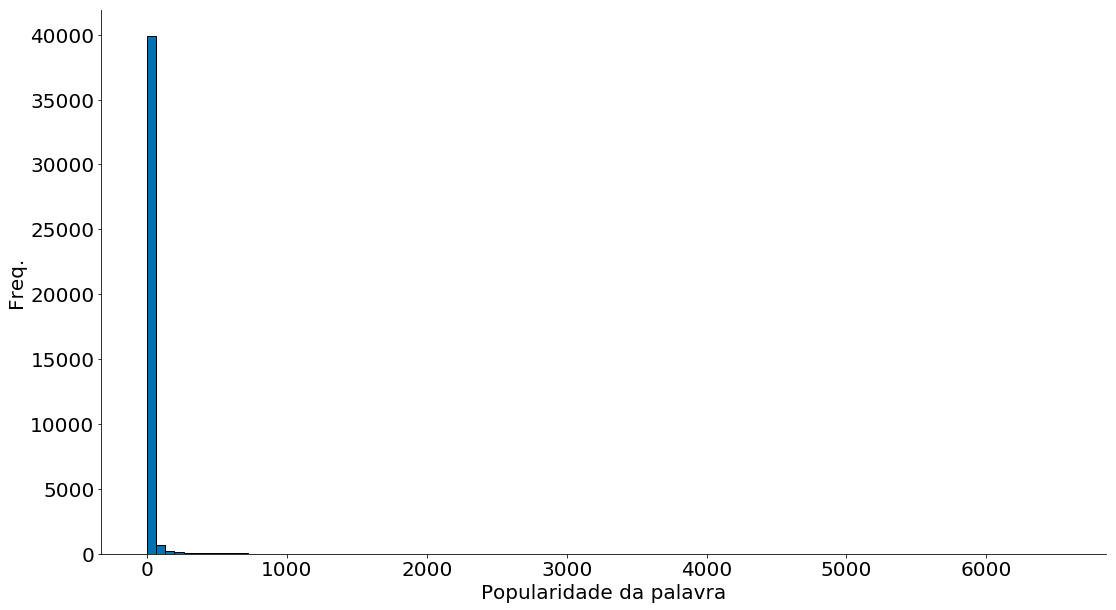

In [40]:
plt.hist(palavras, bins=100, edgecolor='k')
plt.xlabel('Popularidade da palavra')
plt.ylabel('Freq.')
despine()

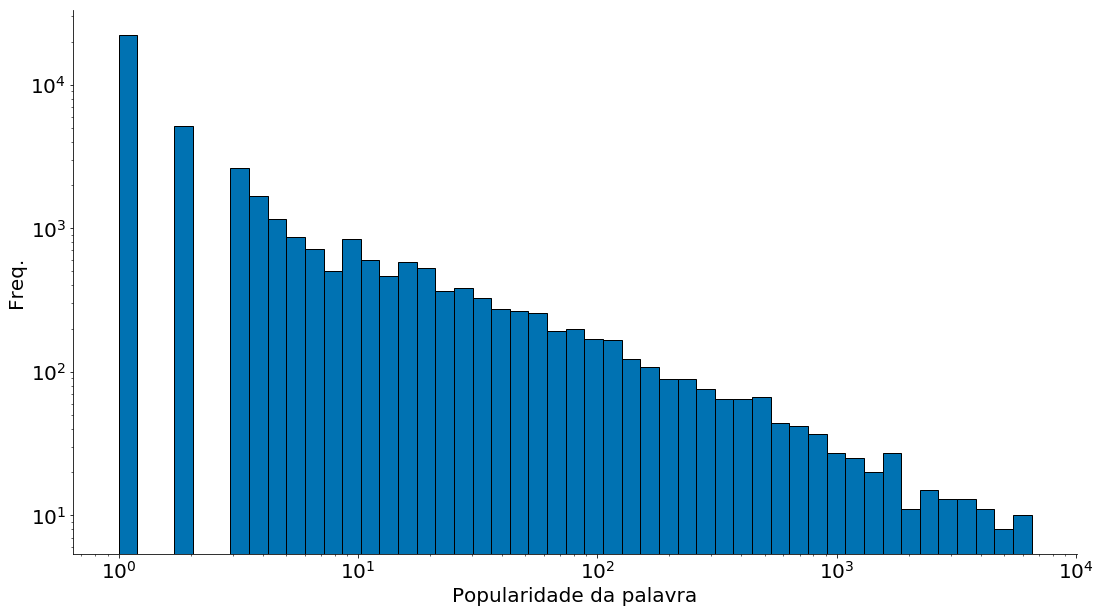

In [41]:
bins = np.logspace(np.log10(palavras.min()), np.log10(palavras.max()))
plt.hist(palavras, bins=bins, edgecolor='k')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Popularidade da palavra')
plt.ylabel('Freq.')
despine()

Observe que a grande maioria dos valores é menor que $10$, mas existe uma quantidade significativa de valores na casa das centenas e até dos milhares. 

Nesse caso, qual é o melhor descritor para esses dados?

In [42]:
print(mean(palavras),
      median(palavras),
      max(palavras),
      mode(palavras))

22.376421549730146 1.0 6528 [1]


Ao que parece, todos eles são importantes.

## Dispersão

Dispersão refere-se a medidas de como se espalham nossos dados. Normalmente, são estatísticas para as quais valores próximos de zero significam que os dados não se espalham de forma alguma e para as quais grandes valores (seja lá o que isso signifique) significam que os dados estão muito dispersos. Por exemplo, uma medida muito simples é o intervalo (ou *range*), que é apenas a diferença entre os elementos maiores e menores:

In [43]:
# "range" já significa algo em Python, então vamos usar outro nome
def data_range(x):
    return max(x) - min(x)

In [44]:
print("range: ", data_range(data))

range:  11.40855


O intervalo é zero precisamente quando `max` e `min` são iguais, o que só pode acontecer se os elementos de `x` forem todos iguais, o que significa que os dados são tão similares (ou não dispersos) quanto possível. Por outro lado, se o intervalo for grande, o `max` é muito maior que o `min` e os dados estão mais espalhados.

Como a mediana, o intervalo não depende realmente de todo o conjunto de dados. Um conjunto de dados cujos pontos são todos 0 ou 100 tem o mesmo intervalo que um conjunto de dados cujos valores são 0, 100 e muitos 50s. Mas parece que o primeiro conjunto de dados "deveria" estar mais espalhado, certo?

Uma medida mais complexa de dispersão é a variância $s^2$. Quando a variância da população é estimada usando $n$ amostras aleatórias $x_1, x_2, ..., x_n$ a fórmula seguinte é um estimador não enviesado:

$$s^{2}={\frac {1}{n-1}}\sum _{{i=1}}^{n}\left(x_{i}-\overline {x}\right)^{2}$$

O código abaixo faz o mesmo:

In [45]:
def de_mean(x):
    """translada x subtraindo sua média (então o resultado tem média 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assume que x tem pelo menos dois elementos"""
    n = len(x)
    deviations = de_mean(x)
    deviations = np.array(deviations) #vamos usar numpy muito de agora em diante
    return np.sum(deviations ** 2) / (n-1)
    #voce pode usar a funcao que implementamos anteriormente:
    #return sum_of_squares(deviations) / (n - 1)

print("variancia: ", variance(data))

variancia:  0.6377261715977038


A primeira observação é o uso do módulo `numpy`. A partir de agora vamos usar muito esse módulo, que contém diversas operações sobre listas, que são implementadas de forma eficiente.

Na aula passada, implementamos a função `sum_of_squares`. Para fazer a mesma coisa, e de forma mais rápida, podemos usar a função `sum` do `numpy` e o operador `**` para elevar todos os elementos de uma lista a uma dada potência, nesse caso, `2`. Note que antes de usar executar essas operações, é necessário converter a lista para um *array* do `numpy`.

Segundo, parece que a variância é quase o desvio médio da média, exceto pelo fato de estarmos dividindo por `n-1` em vez de `n`. De fato, quando estamos lidando com uma amostra de uma população maior, $\overline {x}$ é apenas uma estimativa da média real, o que significa que, em média $\left(x_{i}-\overline {x}\right)^{2}$ é uma subestimativa do desvio ao quadrado de $x_i$ em relação à média. Por isso que nós dividimos por `n-1` ao invés de `n`. Para mais informações, consulte o [Wikipedia](https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation).

Agora, quaisquer que sejam as unidades em que nossos dados estão (por exemplo, "# de amigos"), todas as nossas medidas de tendência central estão nessa mesma unidade. O intervalo será similarmente nessa mesma unidade. A variância, por outro lado, tem unidades que são o quadrado das unidades originais (por exemplo, " # de amigos ao quadrado"). Como pode ser difícil entender essa medida, muitas vezes olhamos para o desvio padrão $s = \sqrt{s^2}$:

In [46]:
print("desvio padrao: ", np.std(data))

desvio padrao:  0.7985034684732251


Tanto o intervalo quanto o desvio padrão têm o mesmo problema discrepante que vimos anteriormente para a média. Usando o mesmo exemplo, se nosso usuário mais amigável tivesse `2000` amigos, o desvio padrão seria muito maior somente por causa desse usuário. Uma alternativa mais robusta calcula a diferença entre o valor do 75º e do 25º percentil:

In [47]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

print("intervalo interquartil:", interquartile_range(data))

intervalo interquartil: 0.8957833333333332


Essa medida é muito pouco afetada por *outliers*.

In [48]:
print("Dispersão para a duração das músicas:")
print("Intervalo:", data_range(data))
print("Variância:", np.var(data))
print("Desvio padrão:", np.std(data))
print("IQR:", interquartile_range(data))

Dispersão para a duração das músicas:
Intervalo: 11.40855
Variância: 0.6376077891637707
Desvio padrão: 0.7985034684732251
IQR: 0.8957833333333332


Medidas de dispersão para dados com "cauda pesada":

In [49]:
print("Dispersão para as palavras:")
print("Intervalo:", data_range(palavras))
print("Variância:", np.var(palavras))
print("Desvio padrão:", np.std(palavras))
print("IQR:", interquartile_range(palavras))

Dispersão para as palavras:
Intervalo: 6527
Variância: 35806.280507086754
Desvio padrão: 189.225475312091
IQR: 3


Por fim, tudo isto poderia ser feito com uma única chamada pandas!

In [50]:
data.describe()

count    5387.000000
mean        3.883652
std         0.798578
min         0.617783
25%         3.387775
50%         3.795450
75%         4.283108
max        12.026333
Name: duration_ms, dtype: float64

Por fim, vamos ver uma correlação entre duração e número de palavras! Explique o código abaixo!

In [51]:
letra_e_musica = df[['duration_ms', 'lyrics']].drop_duplicates()
letra_e_musica['duration_min'] = letra_e_musica['duration_ms'] / (60 * 1000)

x = []
y = []
for indice, row in letra_e_musica.iterrows():
    words = re.sub(r'[^\w\s]', '', row['lyrics'].lower()).strip().split()
    x.append(len(words))
    y.append(row['duration_min'])

Text(0, 0.5, 'Duração')

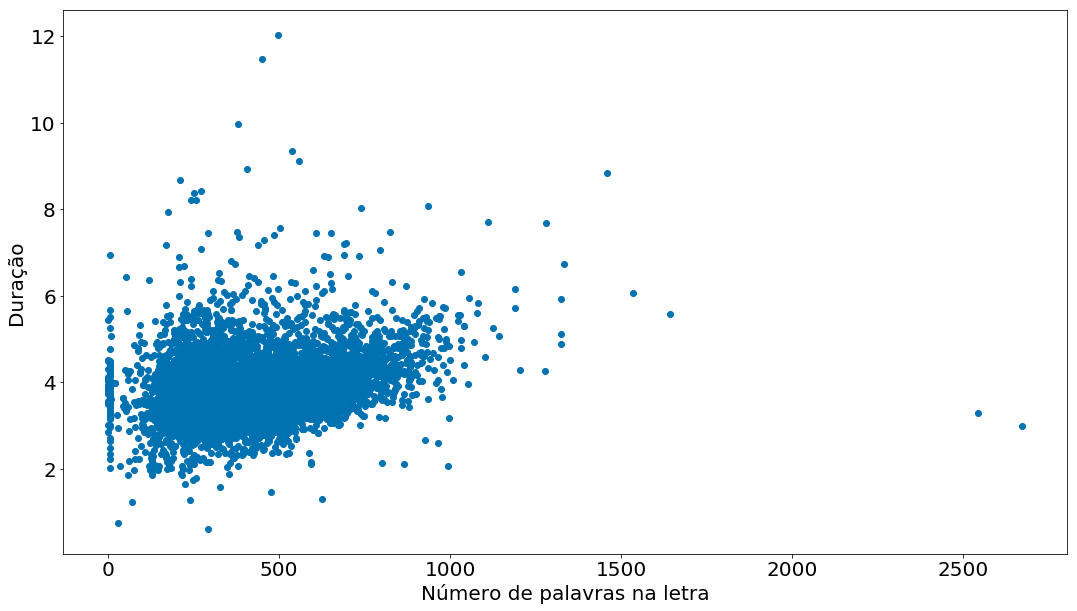

In [52]:
plt.scatter(x, y)
plt.xlabel('Número de palavras na letra')
plt.ylabel('Duração')

## Para explorações futuras

* [`SciPy`](https://www.scipy.org/), [`pandas`](https://pandas.pydata.org/) e [`StatsModels`](https://www.statsmodels.org/stable/index.html) vêm com uma ampla variedade de funções estatísticas.

* Estatísticas são *importantes*. (Ou talvez as estatísticas *sejam* importantes?) Se você quer ser um bom cientista de dados, seria uma boa idéia ler um livro de estatísticas. Muitos estão disponíveis gratuitamente online. Dois exemplos:
 - [*OpenIntro Statistics*](https://www.openintro.org/stat/textbook.php)
 - [*OpenStax Introductory Statistics*](https://openstax.org/details/introductory-statistics)